## IT24100164_preprocessing_missing_values - Member 01

### Import Libraries

In [102]:
# Data handling
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Load Dataset

In [104]:
# Load dataset 
df = pd.read_csv("train.csv")

# Check shape and first 5 rows
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (114000, 21)


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


### Step 2: Check Missing Values (Before Handling)

In [106]:
# Count missing values
missing_before = df.isnull().sum()
print("Missing values BEFORE cleaning:\n", missing_before)

# Percentage
missing_percent_before = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values BEFORE cleaning:\n", missing_percent_before)


Missing values BEFORE cleaning:
 Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Percentage of missing values BEFORE cleaning:
 Unnamed: 0          0.000000
track_id            0.000000
artists             0.000877
album_name          0.000877
track_name          0.000877
popularity          0.000000
duration_ms         0.000000
explicit            0.000000
danceability        0.000000
energy              0.000000
key                 0.000000
loudness            0.000000
mode                0.000000
speechiness         0.000000
acousticness        0.000000
instrumen

### Step 3: Visualize Missing Values (Before Handling)

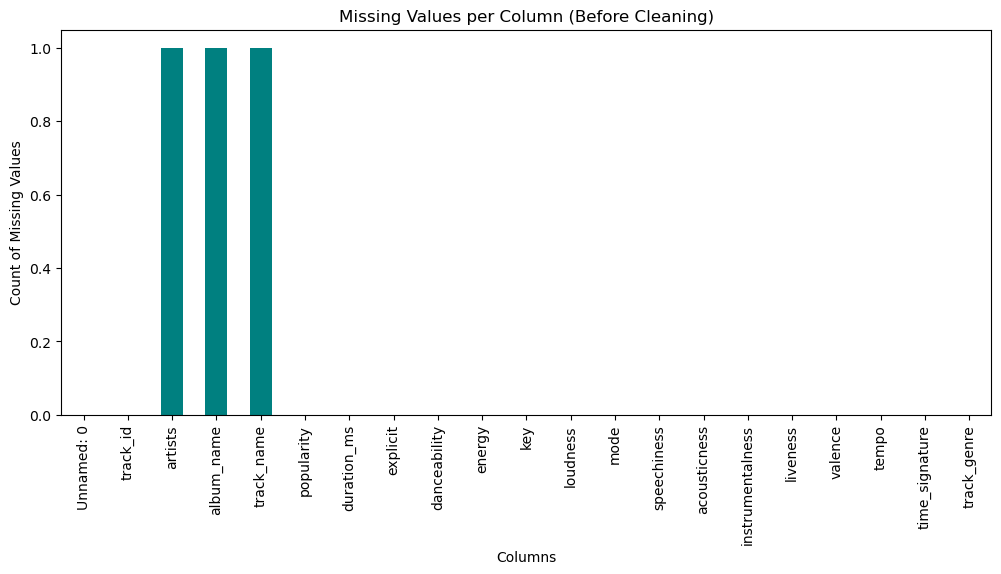

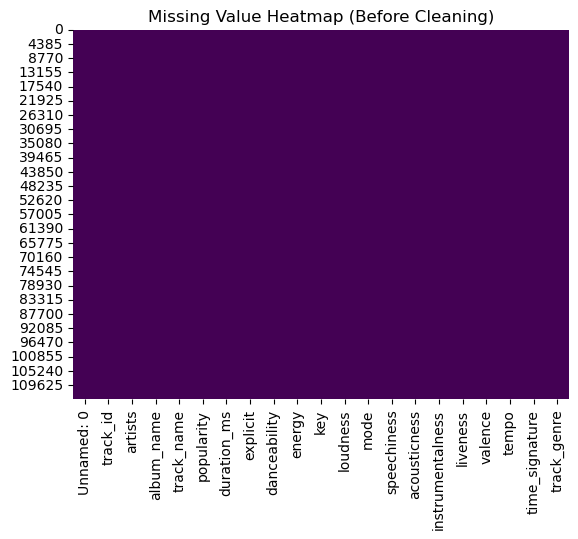

In [108]:
# Bar chart
missing_before.plot(kind="bar", figsize=(12,5), color="teal")
plt.title("Missing Values per Column (Before Cleaning)")
plt.xlabel("Columns")
plt.ylabel("Count of Missing Values")
plt.show()

# Heatmap
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Value Heatmap (Before Cleaning)")
plt.show()


### Step 4: Handle Missing Values

In [110]:
# Numeric features → fill with median
df['popularity'] = df['popularity'].fillna(df['popularity'].median())
df['duration_ms'] = df['duration_ms'].fillna(df['duration_ms'].median())
df['tempo'] = df['tempo'].fillna(df['tempo'].median())
df['loudness'] = df['loudness'].fillna(df['loudness'].median())

# Categorical/discrete features → fill with mode
df['key'] = df['key'].fillna(df['key'].mode()[0])
df['mode'] = df['mode'].fillna(df['mode'].mode()[0])
df['time_signature'] = df['time_signature'].fillna(df['time_signature'].mode()[0])

# Drop rows where target or ID/text columns are missing
df = df.dropna(subset=['track_genre', 'track_id', 'track_name', 'album_name', 'artists'])


### Step 5: Verify Cleaning (After Handling)

In [112]:
missing_after = df.isnull().sum()
print("Missing values AFTER cleaning:\n", missing_after)

missing_percent_after = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values AFTER cleaning:\n", missing_percent_after)


Missing values AFTER cleaning:
 Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Percentage of missing values AFTER cleaning:
 Unnamed: 0          0.0
track_id            0.0
artists             0.0
album_name          0.0
track_name          0.0
popularity          0.0
duration_ms         0.0
explicit            0.0
danceability        0.0
energy              0.0
key                 0.0
loudness            0.0
mode                0.0
speechiness         0.0
acousticness        0.0
instrumentalness    0.0
liveness            0.0
valence             0.0
tempo         

### Step 6: Visualize Missing Values (After Handling)

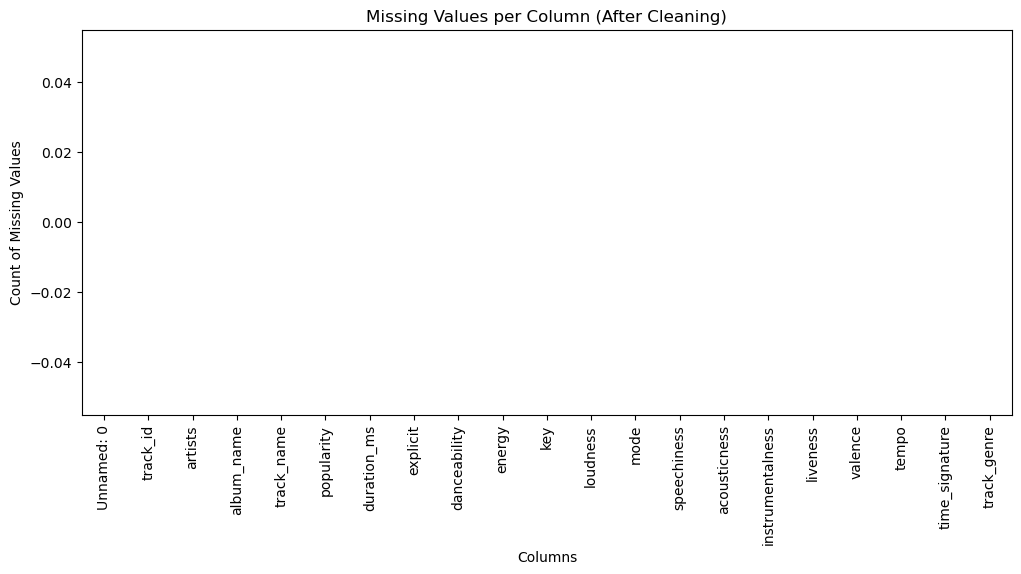

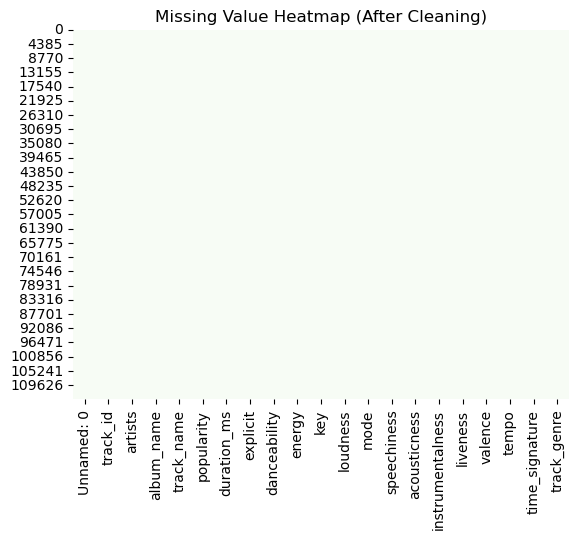

In [114]:
# Bar chart
missing_after.plot(kind="bar", figsize=(12,5), color="green")
plt.title("Missing Values per Column (After Cleaning)")
plt.xlabel("Columns")
plt.ylabel("Count of Missing Values")
plt.show()

# Heatmap
sns.heatmap(df.isnull(), cbar=False, cmap="Greens")
plt.title("Missing Value Heatmap (After Cleaning)")
plt.show()


## IT24100569_Encoding_categorical_variables - Member 02

### Import Libraries

In [116]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

### Step 1: Encoding Categorical Variables

In [118]:
# --- 1a. Encode 'explicit' column ---
# Convert 'explicit' to integer (0 = clean, 1 = explicit)
if df['explicit'].dtype == bool:  
    # Case 1: Already boolean (True/False)
    df['explicit'] = df['explicit'].astype(int)
else:
    # Case 2: Strings ("TRUE"/"FALSE")
    df['explicit'] = df['explicit'].map({'FALSE': 0, 'TRUE': 1})

print("\nExplicit column converted to int (0=Clean, 1=Explicit):")
print(df[['explicit']].head())
print(df['explicit'].value_counts())



Explicit column converted to int (0=Clean, 1=Explicit):
   explicit
0         0
1         0
2         0
3         0
4         0
explicit
0    104252
1      9747
Name: count, dtype: int64


In [120]:
# --- 1b. Label Encode 'track_genre' ---
encoder = LabelEncoder()
df['track_genre_encoded'] = encoder.fit_transform(df['track_genre'])

print("\nTrack genre encoded (Label Encoding) - sample:")
print(df[['track_genre', 'track_genre_encoded']].head())

# Show mapping: label -> genre
print("\nLabel encoding mapping (label -> genre):")
for label, genre in enumerate(encoder.classes_):
    print(label, "->", genre)
    


Track genre encoded (Label Encoding) - sample:
  track_genre  track_genre_encoded
0    acoustic                    0
1    acoustic                    0
2    acoustic                    0
3    acoustic                    0
4    acoustic                    0

Label encoding mapping (label -> genre):
0 -> acoustic
1 -> afrobeat
2 -> alt-rock
3 -> alternative
4 -> ambient
5 -> anime
6 -> black-metal
7 -> bluegrass
8 -> blues
9 -> brazil
10 -> breakbeat
11 -> british
12 -> cantopop
13 -> chicago-house
14 -> children
15 -> chill
16 -> classical
17 -> club
18 -> comedy
19 -> country
20 -> dance
21 -> dancehall
22 -> death-metal
23 -> deep-house
24 -> detroit-techno
25 -> disco
26 -> disney
27 -> drum-and-bass
28 -> dub
29 -> dubstep
30 -> edm
31 -> electro
32 -> electronic
33 -> emo
34 -> folk
35 -> forro
36 -> french
37 -> funk
38 -> garage
39 -> german
40 -> gospel
41 -> goth
42 -> grindcore
43 -> groove
44 -> grunge
45 -> guitar
46 -> happy
47 -> hard-rock
48 -> hardcore
49 -> hardstyle
5

### Step 2: Count number of tracks per genre

In [122]:
genre_counts = df['track_genre'].value_counts()

# Show top 10 genres with their counts
print("Top 10 Genres with Counts:\n")
print(genre_counts.head(10))


Top 10 Genres with Counts:

track_genre
acoustic             1000
afrobeat             1000
psych-rock           1000
progressive-house    1000
power-pop            1000
pop                  1000
pop-film             1000
piano                1000
party                1000
pagode               1000
Name: count, dtype: int64


### Step 3: Exploratory Data Analysis (EDA)

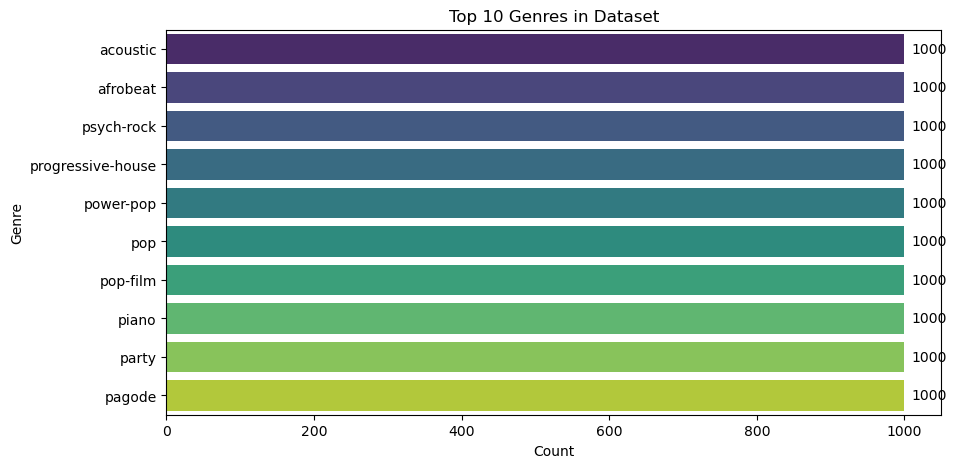

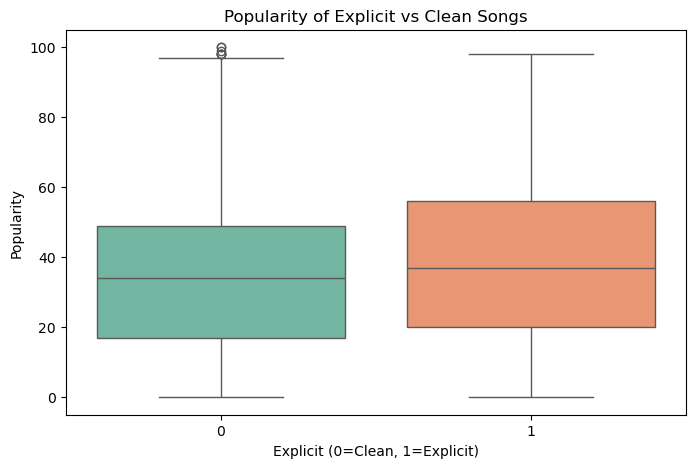

In [124]:
# --- 3a. Barplot: Top 10 genres ---
plt.figure(figsize=(10,5))
ax = sns.barplot(
    y=genre_counts.head(10).index,
    x=genre_counts.head(10).values,
    hue=genre_counts.head(10).index, 
    dodge=False,
    palette="viridis",
    legend=False
)

# Annotate bars with counts
for i, v in enumerate(genre_counts.head(10).values):
    ax.text(v + 10, i, str(v), color='black', va='center')

plt.title("Top 10 Genres in Dataset")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

# --- 3b. Boxplot: Popularity of Explicit vs Clean Songs ---
plt.figure(figsize=(8,5))
sns.boxplot(
    x='explicit', 
    y='popularity', 
    data=df, 
    hue='explicit',      
    legend=False,         
    palette="Set2"
)
plt.title("Popularity of Explicit vs Clean Songs")
plt.xlabel("Explicit (0=Clean, 1=Explicit)")
plt.ylabel("Popularity")
plt.show()


### Step 4: Sanity Check (Optional)

In [126]:
print("\nCounts by original genre:")
print(df['track_genre'].value_counts())
print("\nCounts by encoded genre:")
print(df['track_genre_encoded'].value_counts())



Counts by original genre:
track_genre
acoustic             1000
afrobeat             1000
psych-rock           1000
progressive-house    1000
power-pop            1000
                     ... 
emo                  1000
electronic           1000
electro              1000
world-music          1000
k-pop                 999
Name: count, Length: 114, dtype: int64

Counts by encoded genre:
track_genre_encoded
0      1000
1      1000
84     1000
83     1000
82     1000
       ... 
33     1000
32     1000
31     1000
113    1000
65      999
Name: count, Length: 114, dtype: int64


## IT24100279_OutlierRemoval - Member 03

### Import Libraries

In [128]:
from pathlib import Path
from scipy import stats

### Step 1: Numeric columns

In [130]:
print("Checking if df exists...")
try:
    df
except NameError:
    raise NameError(
        "df is not defined. Make sure you have run Member 1 (missing value cleaning) "
        "and Member 2 (encoding categorical variables) first in this notebook."
    )
    

Checking if df exists...


In [132]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns:", num_cols)
if len(num_cols)==0:
    raise ValueError("No numeric columns found. Convert appropriate columns to numeric before outlier removal.")


Numeric columns: ['Unnamed: 0', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre_encoded']


### Step 2: Show basic stats

In [134]:
display(df[num_cols].describe().T)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,113999.0,56999.421925,32909.243463,0.000,28499.5000,56999.000000,85499.5000,113999.000
popularity,113999.0,33.238827,22.304959,0.000,17.0000,35.000000,50.0000,100.000
duration_ms,113999.0,228031.153387,107296.057716,8586.000,174066.0000,212906.000000,261506.0000,5237295.000
explicit,113999.0,0.085501,0.279627,0.000,0.0000,0.000000,0.0000,1.000
danceability,113999.0,0.566801,0.173543,0.000,0.4560,0.580000,0.6950,0.985
energy,113999.0,0.641383,0.251530,0.000,0.4720,0.685000,0.8540,1.000
key,113999.0,5.309126,3.559999,0.000,2.0000,5.000000,8.0000,11.000
loudness,113999.0,-8.258950,5.029357,-49.531,-10.0130,-7.004000,-5.0030,4.532
mode,113999.0,0.637558,0.480708,0.000,0.0000,1.000000,1.0000,1.000
speechiness,113999.0,0.084652,0.105733,0.000,0.0359,0.048900,0.0845,0.965


### Step 3: Visualize first numeric column before cleaning

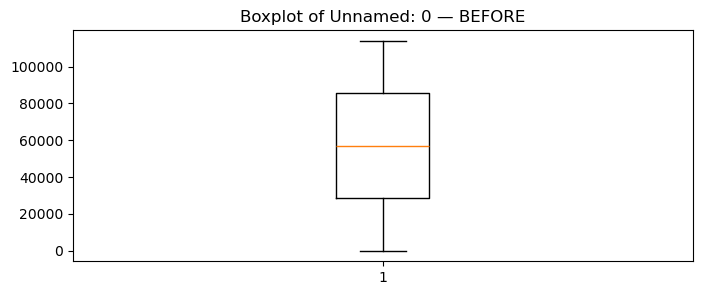

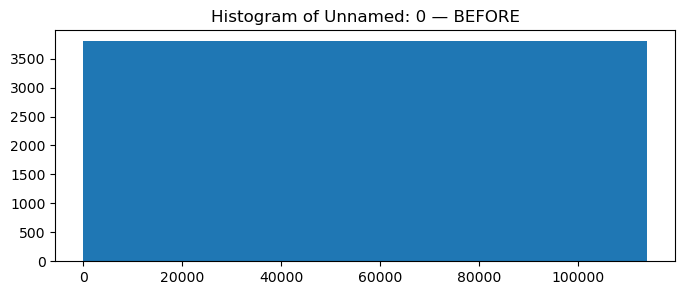

In [136]:
col = num_cols[0]
plt.figure(figsize=(8,3))
plt.boxplot(df[col].dropna())
plt.title(f"Boxplot of {col} — BEFORE")
plt.show()

plt.figure(figsize=(8,3))
plt.hist(df[col].dropna(), bins=30)
plt.title(f"Histogram of {col} — BEFORE")
plt.show()


### Step 4: IQR-based outlier detection (per numeric column)

In [138]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# boolean mask of outliers per column
outlier_mask = pd.DataFrame(False, index=df.index, columns=num_cols)
for c in num_cols:
    outlier_mask[c] = (df[c] < lower[c]) | (df[c] > upper[c])

# counts
outlier_counts = outlier_mask.sum().sort_values(ascending=False)
print("Outlier counts per numeric column (IQR):")
display(outlier_counts)

any_outlier = outlier_mask.any(axis=1)
n_outlier_rows = any_outlier.sum()
print(f"Rows flagged (any numeric column): {n_outlier_rows} of {len(df)} ({n_outlier_rows/len(df):.2%})")


Outlier counts per numeric column (IQR):


instrumentalness       25246
speechiness            13211
time_signature         12157
explicit                9747
liveness                8642
loudness                6173
duration_ms             5616
danceability             620
tempo                    617
popularity                 2
Unnamed: 0                 0
valence                    0
mode                       0
acousticness               0
key                        0
energy                     0
track_genre_encoded        0
dtype: int64

Rows flagged (any numeric column): 55739 of 113999 (48.89%)


### Step 5: Option: remove rows that have any outlier (IQR)

In [140]:
df_clean_iqr = df.loc[~any_outlier].copy()
print("After removal shape:", df_clean_iqr.shape)


After removal shape: (58260, 22)


### Step 6: Visualize same column after cleaning

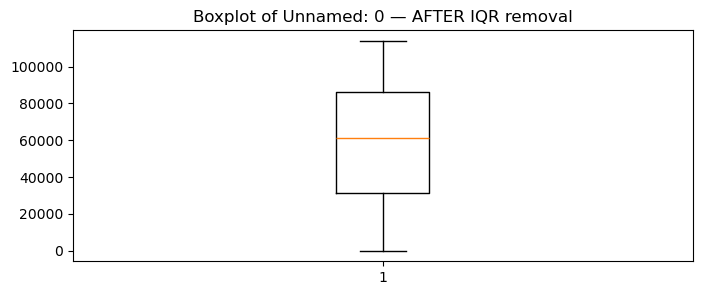

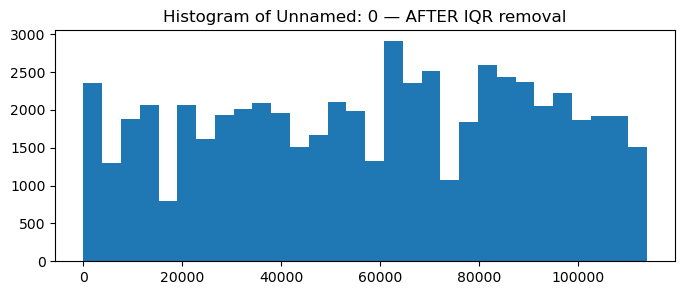

In [142]:
plt.figure(figsize=(8,3))
plt.boxplot(df_clean_iqr[col].dropna())
plt.title(f"Boxplot of {col} — AFTER IQR removal")
plt.show()

plt.figure(figsize=(8,3))
plt.hist(df_clean_iqr[col].dropna(), bins=30)
plt.title(f"Histogram of {col} — AFTER IQR removal")
plt.show()


### Step 7: Alternative check: z-score method (for comparison)

In [144]:
z_scores = np.abs(stats.zscore(df[num_cols].fillna(0)))
z_mask = (z_scores > 3)
z_any = z_mask.any(axis=1)
print("Rows flagged by z-score (|z|>3) in any numeric column:", z_any.sum(), "of", len(df))


Rows flagged by z-score (|z|>3) in any numeric column: 17875 of 113999


## IT24100252_Preprocessing_NormalizationAndScaling - Member 04

### Import Libraries

In [146]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

### Step 1: Select Numeric Features to Scale

In [148]:
# Exclude non-numeric and ID/categorical columns
exclude = ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'track_genre']

# Select numeric columns excluding the ones above
numeric_features = [col for col in df.select_dtypes(include=['number']).columns if col not in exclude]
print("Numeric columns to scale:\n", numeric_features)

# ✅ Keep copies of original tempo and energy after plotting, before scaling
df["tempo_original"] = df["tempo"]
df["energy_original"] = df["energy"]


Numeric columns to scale:
 ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre_encoded']


### Step 2: Plot Numeric Features Before Scaling

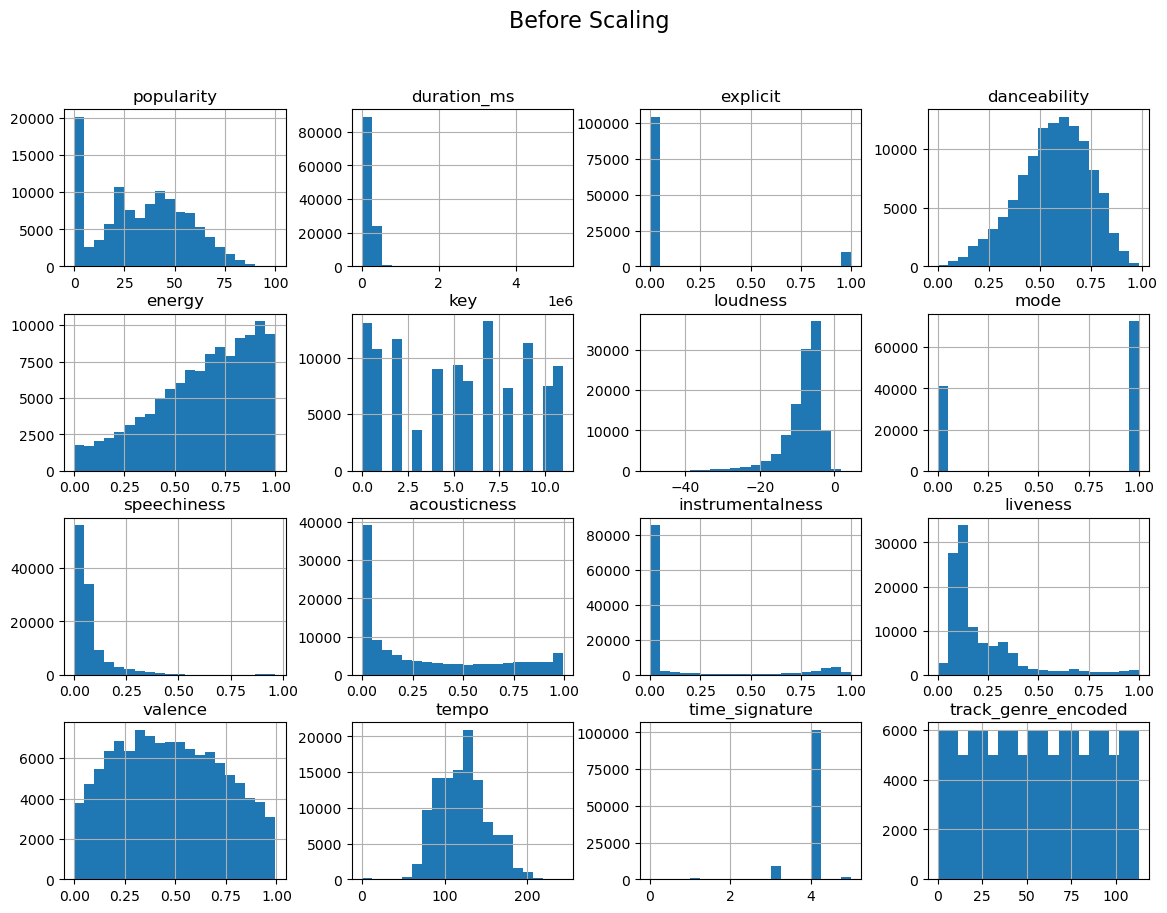

In [150]:
# Plot histograms of numeric features before scaling
df[numeric_features].hist(bins=20, figsize=(14,10))
plt.suptitle("Before Scaling", fontsize=16)
plt.show()


### Step 3: Apply Standard Scaling

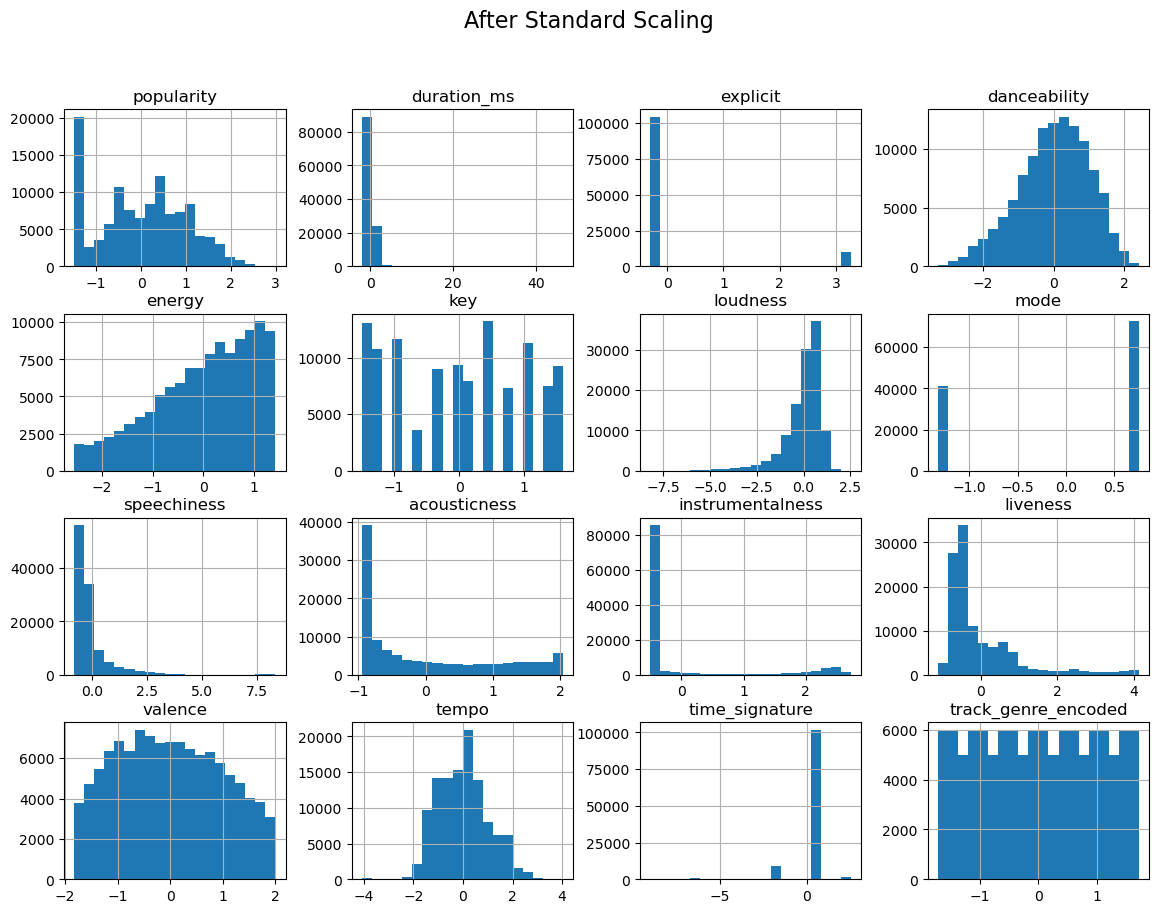

In [152]:
# Initialize StandardScaler
scaler = StandardScaler()

# Create a copy of the dataset to store scaled values
df_standard = df.copy()

# Scale numeric features
df_standard[numeric_features] = scaler.fit_transform(df[numeric_features])

# Plot histograms after scaling
df_standard[numeric_features].hist(bins=20, figsize=(14,10))
plt.suptitle("After Standard Scaling", fontsize=16)
plt.show()


### Step 4: Verify Scaling

In [154]:
# Check mean and standard deviation of scaled features
print("🔹 Standard Scaling: mean & std")
print(df_standard[numeric_features].agg(['mean','std']).round(2))


🔹 Standard Scaling: mean & std
      popularity  duration_ms  explicit  danceability  energy  key  loudness  \
mean        -0.0         -0.0      -0.0          -0.0     0.0  0.0       0.0   
std          1.0          1.0       1.0           1.0     1.0  1.0       1.0   

      mode  speechiness  acousticness  instrumentalness  liveness  valence  \
mean  -0.0          0.0          -0.0              -0.0       0.0     -0.0   
std    1.0          1.0           1.0               1.0       1.0      1.0   

      tempo  time_signature  track_genre_encoded  
mean    0.0            -0.0                  0.0  
std     1.0             1.0                  1.0  


## IT24100664_Feature_Engineering - Member 05

### Step 1: Reverse Standard Scaling to get raw values back (for interpretability)

In [156]:
df["tempo_raw"] = df["tempo"] * scaler.scale_[numeric_features.index("tempo")] + scaler.mean_[numeric_features.index("tempo")]
df["energy_raw"] = df["energy"] * scaler.scale_[numeric_features.index("energy")] + scaler.mean_[numeric_features.index("energy")]


In [158]:
# Show first 5 rows
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,liveness,valence,tempo,time_signature,track_genre,track_genre_encoded,tempo_original,energy_original,tempo_raw,energy_raw
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,...,0.3580,0.715,87.917,4,acoustic,0,87.917,0.4610,2757.737440,0.757338
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,...,0.1010,0.267,77.489,4,acoustic,0,77.489,0.1660,2445.125205,0.683137
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,...,0.1170,0.120,76.332,4,acoustic,0,76.332,0.3590,2410.440476,0.731682
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,...,0.1320,0.143,181.740,3,acoustic,0,181.740,0.0596,5570.378188,0.656374
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,...,0.0829,0.167,119.949,4,acoustic,0,119.949,0.4430,3717.997807,0.752811


### Step 2: Create Tempo/Energy Ratio feature

In [160]:
# Add 0.0001 to avoid division by zero
df["Tempo_Energy_Ratio"] = df["tempo"] / (df["energy"] + 0.0001)

# Display first 5 rows with new feature
df[["tempo", "energy", "Tempo_Energy_Ratio"]].head()


,tempo,energy,Tempo_Energy_Ratio
0,87.917,0.4610,190.667968
1,77.489,0.1660,466.520169
2,76.332,0.3590,212.564745
3,181.740,0.0596,3044.221106
4,119.949,0.4430,270.704130


### Step 3: Preview new feature

In [162]:
print("\nSample rows with Tempo/Energy Ratio feature:")
print(df[["tempo_raw", "energy_raw", "Tempo_Energy_Ratio"]].head())



Sample rows with Tempo/Energy Ratio feature:
     tempo_raw  energy_raw  Tempo_Energy_Ratio
0  2757.737440    0.757338          190.667968
1  2445.125205    0.683137          466.520169
2  2410.440476    0.731682          212.564745
3  5570.378188    0.656374         3044.221106
4  3717.997807    0.752811          270.704130


### Step 4: statistics of the new featur

In [164]:
# Show basic statistics of the new feature
print("\nStatistics of Tempo/Energy Ratio:")
print(df["Tempo_Energy_Ratio"].describe())



Statistics of Tempo/Energy Ratio:
count    1.139990e+05
mean     4.656162e+02
std      8.713497e+03
min      0.000000e+00
25%      1.438829e+02
50%      1.818183e+02
75%      2.584459e+02
max      1.127413e+06
Name: Tempo_Energy_Ratio, dtype: float64


### Step 5: Visualization - Histogram of Tempo/Energy Ratio

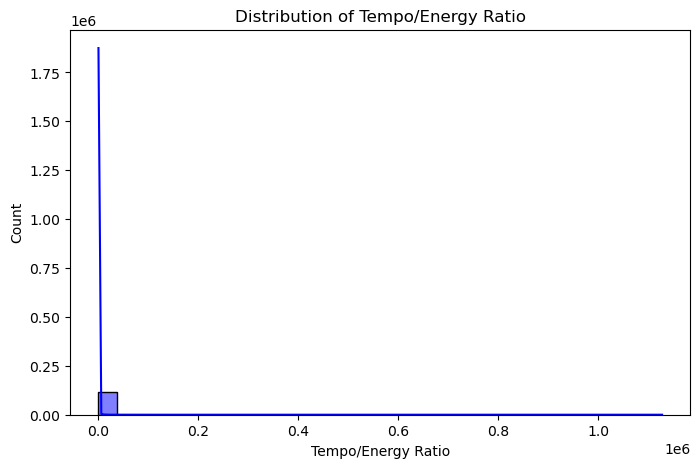

In [166]:
# Plot histogram of Tempo/Energy Ratio
plt.figure(figsize=(8,5))
sns.histplot(df["Tempo_Energy_Ratio"], bins=30, kde=True, color="blue")
plt.title("Distribution of Tempo/Energy Ratio")
plt.xlabel("Tempo/Energy Ratio")
plt.ylabel("Count")
plt.show()


## IT24100567_Dimensionality_Reduction - Member 06

### Import Libraries

In [168]:
from sklearn.decomposition import PCA

### Step 1: Select Numeric Features

In [170]:
# select only the numeric features for PCA 
features = [
    'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 
    'key', 'loudness', 'mode', 'speechiness', 'acousticness', 
    'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'
]
X = df[features]

y = df['track_genre']

print("Features shape:", X.shape)


Features shape: (113999, 15)


### Step 2: Standardize Features

In [172]:
# standardize the data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### Step 3: Apply PCA (95% Variance)

In [174]:
# apply PCA 
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print("Original features:", X.shape[1])
print("Reduced features after PCA:", X_pca.shape[1])


Original features: 15
Reduced features after PCA: 13


### Step 4: Explained Variance Plot

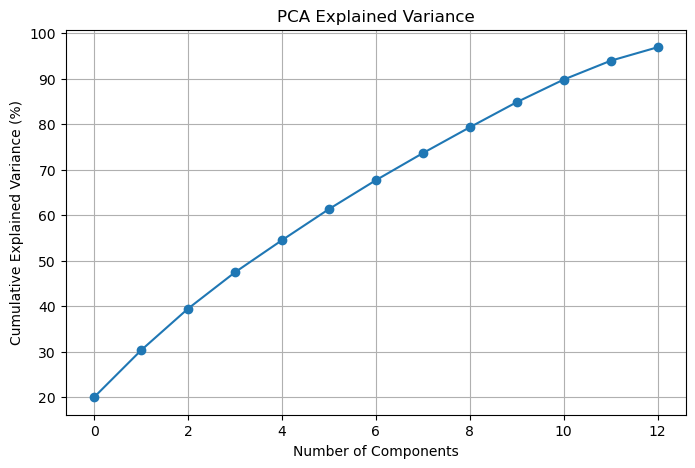

In [176]:
#plot the explained variance 
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance (%)")
plt.title("PCA Explained Variance")
plt.grid(True)
plt.show()


### Step 5: 2D PCA Scatterplot

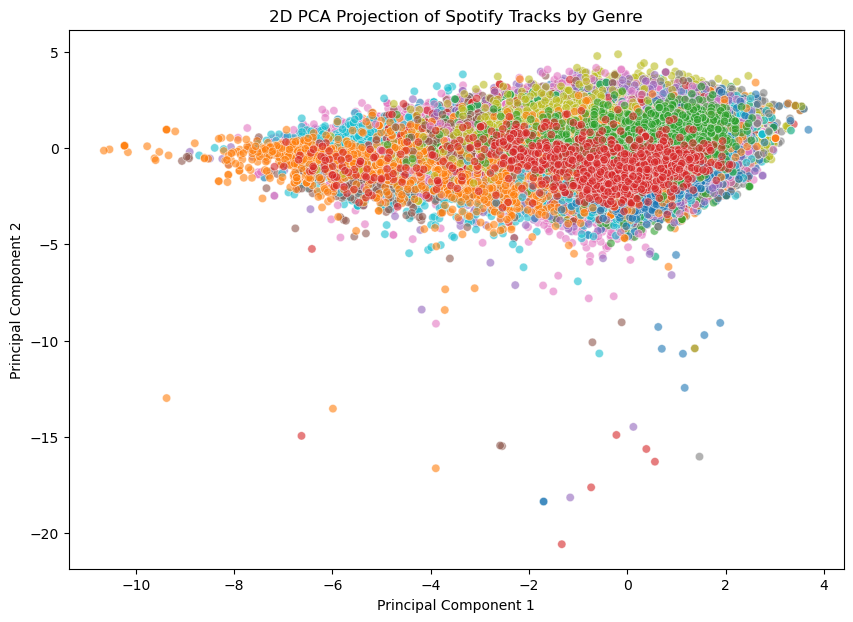

In [178]:
# visualize how different genres seperate in reduced space
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(10,7))
sns.scatterplot(
    x=X_pca_2d[:,0], y=X_pca_2d[:,1], 
    hue=y, alpha=0.6, palette="tab10", legend=False
)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Projection of Spotify Tracks by Genre")
plt.show()


### Step 5: save file 

In [180]:
#  Save Processed PCA Dataset (CSV )
pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=pca_columns)
df_pca['track_genre'] = y.values  

# Save as CSV
df_pca.to_csv("spotify_tracks_final_PCA.csv", index=False)
# Save as excel
df_pca.to_excel("spotify_tracks_final_PCA.xlsx", index=False)

print("Processed Final PCA dataset saved as Excel & csv successfully!")
df_pca.head()


Processed Final PCA dataset saved as Excel & csv successfully!


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,track_genre
0,0.727053,0.932404,0.141283,-0.262536,1.282265,0.529281,-1.620339,-0.705474,-1.575765,0.801287,0.309519,0.278433,-0.231169,acoustic
1,-3.267375,1.535155,-0.055187,0.960288,1.452413,-0.009076,-0.546587,0.075177,-0.445229,-0.548251,-0.665256,0.647586,-0.308011,acoustic
2,-1.414192,0.000278,-0.232129,1.014568,1.893687,-0.359387,-0.842157,-0.811285,-0.310013,-0.993696,-0.535261,0.803570,0.230972,acoustic
3,-3.805450,-0.201328,0.277168,2.225721,1.809368,1.150735,1.854719,0.225704,-0.067523,1.970772,-0.425078,-0.017988,0.275548,acoustic
4,-0.950467,0.431861,-0.617930,0.802025,2.500580,0.378040,-0.092695,0.169981,-0.129990,0.001905,0.120810,0.718587,0.738507,acoustic
